In [1]:
import numpy as np
import json
from pprint import pprint
import matplotlib.pyplot as plt
import matplotlib
from collections import defaultdict

plt.rcParams['figure.figsize'] = [16, 4]
from plot_utils import *

In [2]:
def plot_one_result_pval_var(ax,plot_item_list,ate_noise,run_list,pval_list,main_enum,noise,reg_fname_pattern,erm_fname_pattern,pvalt0=None,pvalt1=None,clambda=None,telambda=None,t0ate=None,t1ate=None,hwidth=None,label_prefix=""):
    #Getting the result dict
    if clambda!=None:
        if t0ate!=None and hwidth!=None:
            result_dict = get_all_result_dict(run_list=run_list,
                                          pval_list=pval_list,
                                          enum=main_enum,
                                          fname_pattern=reg_fname_pattern.format(
                                                                              "{1}",
                                                                              noise,
                                                                              "{0}",
                                                                              pvalt1,
                                                                              t0ate,
                                                                              t1ate,
                                                                              ate_noise,
                                                                              clambda,
                                                                              hwidth,
                                      )
                    )
        elif t0ate!=None and hwidth==None:
            result_dict = get_all_result_dict(run_list=run_list,
                                          pval_list=pval_list,
                                          enum=main_enum,
                                          fname_pattern=reg_fname_pattern.format(
                                                                              "{1}",
                                                                              noise,
                                                                              "{0}",
                                                                              pvalt1,
                                                                              t0ate,
                                                                              t1ate,
                                                                              ate_noise,
                                                                              clambda,
                                      )
                    )
        else:
            result_dict = get_all_result_dict(run_list=run_list,
                                          pval_list=pval_list,
                                          enum=main_enum,
                                          fname_pattern=reg_fname_pattern.format(
                                                                              "{1}",
                                                                              noise,
                                                                              "{0}",
                                                                              pvalt1,
                                                                              ate_noise,
                                                                              clambda,
                                      )
                    )
    else:
        #This is not being used now. We directly pass the fname and telambda inside the clambda
        result_dict = get_all_result_dict(run_list=run_list,
                                      pval_list=pval_list,
                                      enum=main_enum,
                                      fname_pattern="dataset/nlp_toy2/nlp_logs/cad.s2.rnum({}).noise({}).pval({}).ate_noise({}).telambda({})/probe_metric_list.json".format(
                                                                          "{1}",
                                                                          noise,
                                                                          "{0}",
                                                                          ate_noise,
                                                                          telambda,
                                  )
                )
    
    #Add the erm curve
    erm_result_dict = get_all_result_dict(run_list=run_list,
                                          pval_list=pval_list,
                                          enum=main_enum,
                                          fname_pattern=erm_fname_pattern.format(
                                                                          "{1}",
                                                                          noise,
                                                                          "{0}",
                                                                          pvalt1,
                                  )
    
    )
    
    #Plotting each of the plot item
    for pidx,plot_item in enumerate(plot_item_list):
        #Getting the erm value
        _, labels = ax[pidx].get_legend_handles_labels()
        if "erm" not in labels:
            erm_item_yval=[erm_result_dict[pval][plot_item]["mean"] for pval in pval_list]
            yerr=[0.0]*len(erm_item_yval)
            #Plotting the item
            ax[pidx].errorbar(pval_list,erm_item_yval,yerr,label="erm",ls="-.",marker="o",alpha=0.7)
            #ax[pidx,anidx].fill_between(pval_list,ylb,yub,alpha=0.2)
            
           
        
            
        #Getting the value for this item
        item_yval = [result_dict[pval][plot_item]["mean"] for pval in pval_list]
        yerr=[0.0]*len(item_yval)
        #Plotting the item
        ax[pidx].errorbar(pval_list,item_yval,yerr,label=label_prefix+"ate_noise={}".format(ate_noise),ls="-.",marker="o",alpha=0.7)
        #ax[pidx,anidx].fill_between(pval_list,ylb,yub,alpha=0.2)
        
        
        
        
        ax[pidx].set_xlabel("predictive-correlation")
        ax[pidx].set_ylabel(plot_item)
        
        if "pdelta" not in plot_item:
            ax[pidx].set_ylim(0.0,1.1)
        
        ax[pidx].legend()
        ax[pidx].grid(True)

In [3]:
def plot_one_result_ate_pval_pair(ax,plot_item_list,ate_noise_list,run_list,pval_list,main_enum,noise,reg_fname_pattern,erm_fname_pattern,pvalt0=None,pvalt1=None,clambda=None,telambda=None,t0ate=None,t1ate=None):
    #Getting the result dict
    #Getting the result dict for all the ate noise also
    all_result_dict=defaultdict(dict)
    for ate_noise in ate_noise_list:
        if clambda!=None:
            if t0ate!=None:
                result_dict = get_all_result_dict(run_list=run_list,
                                              pval_list=pval_list,
                                              enum=main_enum,
                                              fname_pattern=reg_fname_pattern.format(
                                                                                  "{1}",
                                                                                  noise,
                                                                                  "{0}",
                                                                                  pvalt1,
                                                                                  t0ate,
                                                                                  t1ate,
                                                                                  ate_noise,
                                                                                  clambda,
                                          )
                        )
                all_result_dict[ate_noise]=result_dict
            else:
                result_dict = get_all_result_dict(run_list=run_list,
                                              pval_list=pval_list,
                                              enum=main_enum,
                                              fname_pattern=reg_fname_pattern.format(
                                                                                  "{1}",
                                                                                  noise,
                                                                                  "{0}",
                                                                                  pvalt1,
                                                                                  ate_noise,
                                                                                  clambda,
                                          )
                        )
                all_result_dict[ate_noise]=result_dict
        else:
            result_dict = get_all_result_dict(run_list=run_list,
                                          pval_list=pval_list,
                                          enum=main_enum,
                                          fname_pattern="dataset/nlp_toy2/nlp_logs/cad.s2.rnum({}).noise({}).pval({}).ate_noise({}).telambda({})/probe_metric_list.json".format(
                                                                              "{1}",
                                                                              noise,
                                                                              "{0}",
                                                                              ate_noise,
                                                                              telambda,
                                      )
                    )

    #Add the erm curve
    erm_result_dict = get_all_result_dict(run_list=run_list,
                                          pval_list=pval_list,
                                          enum=main_enum,
                                          fname_pattern=erm_fname_pattern.format(
                                                                          "{1}",
                                                                          noise,
                                                                          "{0}",
                                                                          pvalt1,
                                  )
    
    )
    
    #Plotting each of the plot item
    for pidx,plot_item in enumerate(plot_item_list):
        #Getting the erm value
        _, labels = ax[pidx].get_legend_handles_labels()
        if "erm" not in labels:
            erm_item_yval=[erm_result_dict[pval][plot_item]["mean"] for pval in pval_list]
            yerr=[0.0]*len(erm_item_yval)
            #Plotting the item
            ax[pidx].errorbar(pval_list,erm_item_yval,yerr,label="erm",ls="-.",marker="o",alpha=0.7)
            #ax[pidx,anidx].fill_between(pval_list,ylb,yub,alpha=0.2)
            
           
        
            
        #Getting the value for this item
        item_yval = [all_result_dict[ate_noise][pval][plot_item]["mean"] for ate_noise,pval in zip(ate_noise_list,pval_list)]
        yerr=[0.0]*len(item_yval)
        #Plotting the item
        ax[pidx].errorbar(pval_list,item_yval,yerr,label="ate_noise={}".format("stage1"),ls="-.",marker="o",alpha=0.7)
        #ax[pidx,anidx].fill_between(pval_list,ylb,yub,alpha=0.2)
        
        
        
        
        ax[pidx].set_xlabel("predictive-correlation")
        ax[pidx].set_ylabel(plot_item)
        
        if "pdelta" not in plot_item:
            ax[pidx].set_ylim(0.0,1.1)
        
        ax[pidx].legend()
        ax[pidx].grid(True)

In [11]:
def plot_one_result_timeline(ax,plot_item_list,run_list,pval_list,ate_list,fname_pattern,tidx,title):
    #Getting the timeline
    result_dict_timeline = get_all_result_timeline_stage2(
                                            run_list= run_list,
                                            pval_list=pval_list,
                                            ate_list = ate_list,
                                            fname_pattern=fname_pattern
    )
    get_best_interation_indo_ood(result_dict_timeline)
    
#     print(result_dict_timeline)
    
    #Plotting each of the plot item
    for pidx,plot_item in enumerate(plot_item_list):
        #Getting the erm value
        
        #Getting the timeline item
        for pval in pval_list:
            item_pval_yval_timeline = result_dict_timeline[pval][plot_item]["mean"]
            yerr= result_dict_timeline[pval][plot_item]["std"]
            xval = range(len(item_pval_yval_timeline))

            #Plotting the item
            ax[pidx,tidx].errorbar(xval,item_pval_yval_timeline,yerr,label="{}+pval={}".format(title,pval),ls="-.",marker="o",alpha=0.7)
            #ax[pidx,anidx].fill_between(pval_list,ylb,yub,alpha=0.2)
            
            ax[pidx,tidx].set_xlabel("epoch")
            ax[pidx,tidx].set_ylabel(plot_item)
            
            if "pdelta" in plot_item:
                ax[pidx,tidx].set_ylim(0,0.75)
            else:
                ax[pidx,tidx].set_ylim(0.7,1.2)
        
#             if "pdelta" not in plot_item or "loss" not in plot_item or "norm" not in plot_item:
#                 ax[pidx,0].set_ylim(0.0,1.1)
            
#             if "pdelta" in plot_item or "smin" in plot_item:
#                 pass
#             else:
            ax[pidx,tidx].legend()
            ax[pidx,tidx].grid(True)
            ax[pidx,tidx].set_title(title)
        
#         if plot_item=="emb_norm":
#             continue
    

In [8]:
def get_best_interation_indo_ood(result_dict_timeline):
    #Getting the number of iteration
    num_epoch = result_dict_timeline["inf"]["acc:main"]["mean"]
    
    #Going over the iteration and selecting the best iteation based on mean indo and ood
    indo = result_dict_timeline["inf"]["acc:main"]["mean"]
    ood = result_dict_timeline["inf"]["topic0_smin"]["mean"]
    crit = (indo+ood)/2.0
    
    #Getting the max position and the guy
    best_loc = np.argmax(crit)
    print("best loc :",best_loc)
    print("best indo:",indo[best_loc])
    print("best ood :",ood[best_loc])

## Strategy 2: Ranking experiment (match with absolute TE)

NameError: name 'ate_list_dummy' is not defined

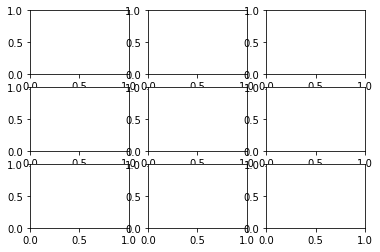

In [6]:
run_list=[0,1,2]
pval_list=[0.5,0.6,0.7,0.8,0.9]
ate_list_true = [0.45,0.54,0.58,"0.60",0.69] #correct one
ate_list_dr = [0.05 ,0.25 ,0.45 ,0.4 ,0.6] #DR with correct masking

topic_name="food"
sample=350


telambda = 1
noise=0.0
    

plot_item_list=[
            "acc:main",
            "topic0_smin",
            "topic0_pdelta_all",
#             "emb_norm",
#             "topic0_pos_con_loss",
#             "topic0_neg_con_loss",
#             "topic0_last_emb_norm",
#             "topic1_pos_con_loss",
#             "topic1_neg_con_loss",
#             "topic1_last_emb_norm",
            
]

reg_fname_pattern="dataset/cebab/nlp_logs/cad.cebabs2.rnum({}).topic({}).sample({}).noise({}).pval({}).t0_ate({}).telambda({})/probe_metric_list.json"
erm_fname_pattern="dataset/cebab/nlp_logs/cad.cebabs2.rnum({}).topic({}).sample({}).pval({}).erm/probe_metric_list.json"

plt.rcParams['figure.figsize'] = [16, 5*len(plot_item_list)]
fig,ax = plt.subplots(len(plot_item_list),3)

plot_one_result_timeline(ax=ax,
                         plot_item_list=plot_item_list,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=ate_list_dummy,
                         fname_pattern=erm_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             "{0}",
                             
                         ),
                         tidx=0,
                         title="ERM",
)
plot_one_result_timeline(ax=ax,
                         plot_item_list=plot_item_list,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=ate_list_true,
                         fname_pattern=reg_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             noise,
                                             "{0}",
                                             "{2}",
                                             telambda,
                             
                         ),
                         tidx=1,
                         title="ATE-TE-REG True",
)
plot_one_result_timeline(ax=ax,
                         plot_item_list=plot_item_list,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=ate_list_dr,
                         fname_pattern=reg_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             noise,
                                             "{0}",
                                             "{2}",
                                             telambda,
                             
                         ),
                         tidx=2,
                         title="ATE-TE-REG DR",
)

In [ ]:
run_list=[0,1,2]
pval_list=[0.5,0.6,0.7,0.8,0.9]
ate_list_dummy = [None]*len(pval_list)
ate_list_true = [0.15,0.175,0.2,0.27,0.32] #correct one
ate_list_dr = [0.3 ,0.1 ,0.2 ,0.48 ,0.4] #DR with correct masking


topic_name="service"
sample=200


telambda = 1
noise=0.0
    

plot_item_list=[
            "acc:main",
            "topic0_smin",
            "topic0_pdelta_all",
#             "emb_norm",
#             "topic0_pos_con_loss",
#             "topic0_neg_con_loss",
#             "topic0_last_emb_norm",
#             "topic1_pos_con_loss",
#             "topic1_neg_con_loss",
#             "topic1_last_emb_norm",
            
]

reg_fname_pattern="dataset/cebab/nlp_logs/cad.cebabs2.rnum({}).topic({}).sample({}).noise({}).pval({}).t0_ate({}).telambda({})/probe_metric_list.json"
erm_fname_pattern="dataset/cebab/nlp_logs/cad.cebabs2.rnum({}).topic({}).sample({}).pval({}).erm/probe_metric_list.json"

plt.rcParams['figure.figsize'] = [16, 5*len(plot_item_list)]
fig,ax = plt.subplots(len(plot_item_list),3)

plot_one_result_timeline(ax=ax,
                         plot_item_list=plot_item_list,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=ate_list_dummy,
                         fname_pattern=erm_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             "{0}",
                             
                         ),
                         tidx=0,
                         title="ERM",
)
plot_one_result_timeline(ax=ax,
                         plot_item_list=plot_item_list,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=ate_list_true,
                         fname_pattern=reg_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             noise,
                                             "{0}",
                                             "{2}",
                                             telambda,
                             
                         ),
                         tidx=1,
                         title="ATE-TE-REG True",
)
plot_one_result_timeline(ax=ax,
                         plot_item_list=plot_item_list,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=ate_list_dr,
                         fname_pattern=reg_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             noise,
                                             "{0}",
                                             "{2}",
                                             telambda,
                             
                         ),
                         tidx=2,
                         title="ATE-TE-REG DR",
)

NameError: name 'ate_list_dummy' is not defined

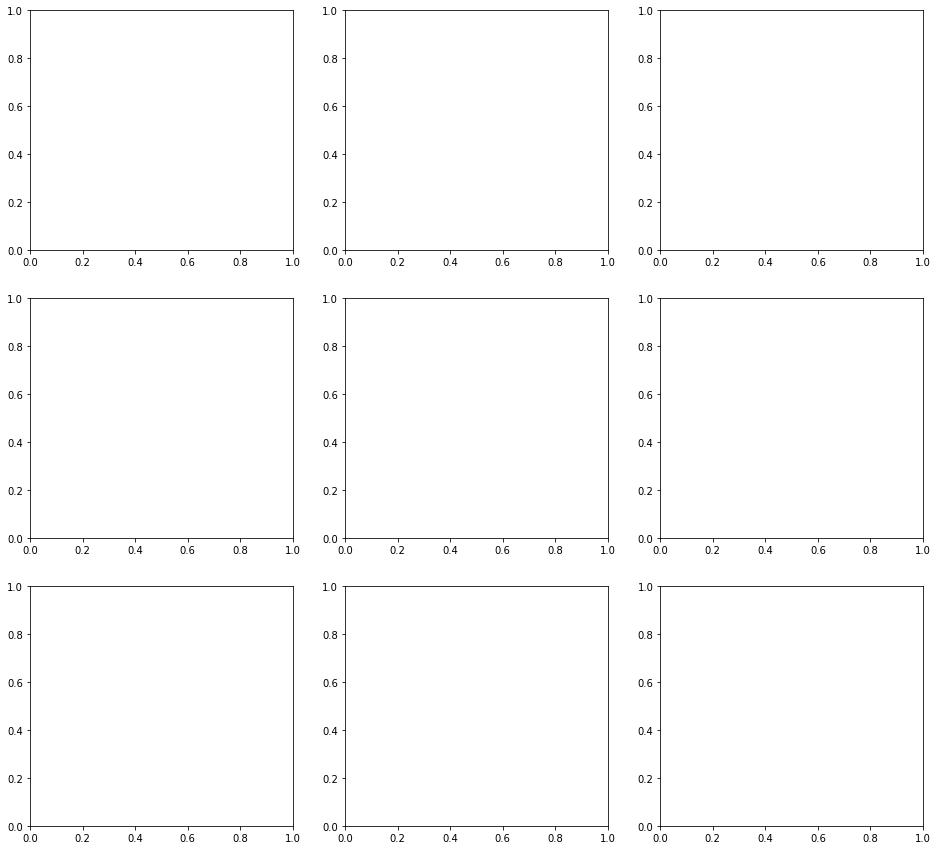

In [7]:
run_list=[0,1,2]
pval_list=[0.5,0.6,0.7,0.8]
ate_list_true = [0.15,0.2,0.21,0.22] #correct one
ate_list_dr = [0.62,0.3,0.12,0.25] #DR with correct masking



topic_name="ambiance"
sample=100


telambda = 10
noise=0.0
    

plot_item_list=[
            "acc:main",
            "topic0_smin",
            "topic0_pdelta_all",
#             "emb_norm",
#             "topic0_pos_con_loss",
#             "topic0_neg_con_loss",
#             "topic0_last_emb_norm",
#             "topic1_pos_con_loss",
#             "topic1_neg_con_loss",
#             "topic1_last_emb_norm",
            
]

reg_fname_pattern="dataset/cebab/nlp_logs/cad.cebabs2.rnum({}).topic({}).sample({}).noise({}).pval({}).t0_ate({}).telambda({})/probe_metric_list.json"
erm_fname_pattern="dataset/cebab/nlp_logs/cad.cebabs2.rnum({}).topic({}).sample({}).pval({}).erm/probe_metric_list.json"

plt.rcParams['figure.figsize'] = [16, 5*len(plot_item_list)]
fig,ax = plt.subplots(len(plot_item_list),3)

plot_one_result_timeline(ax=ax,
                         plot_item_list=plot_item_list,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=ate_list_dummy,
                         fname_pattern=erm_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             "{0}",
                             
                         ),
                         tidx=0,
                         title="ERM",
)
plot_one_result_timeline(ax=ax,
                         plot_item_list=plot_item_list,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=ate_list_true,
                         fname_pattern=reg_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             noise,
                                             "{0}",
                                             "{2}",
                                             telambda,
                             
                         ),
                         tidx=1,
                         title="ATE-TE-REG True",
)
plot_one_result_timeline(ax=ax,
                         plot_item_list=plot_item_list,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=ate_list_dr,
                         fname_pattern=reg_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             noise,
                                             "{0}",
                                             "{2}",
                                             telambda,
                             
                         ),
                         tidx=2,
                         title="ATE-TE-REG DR",
)

In [ ]:
run_list=[0,1,2]
pval_list=[0.5,0.6,0.7,0.8]
ate_list_true = [0.1,0.125,0.12,0.2] #correct one
ate_list_dr = [0.0,0.0,0.65,0.25] #DR with correct masking



topic_name="noise"
sample=50


telambda = 1
noise=0.0
    

plot_item_list=[
            "acc:main",
            "topic0_smin",
            "topic0_pdelta_all",
#             "emb_norm",
#             "topic0_pos_con_loss",
#             "topic0_neg_con_loss",
#             "topic0_last_emb_norm",
#             "topic1_pos_con_loss",
#             "topic1_neg_con_loss",
#             "topic1_last_emb_norm",
            
]

reg_fname_pattern="dataset/cebab/nlp_logs/cad.cebabs2.rnum({}).topic({}).sample({}).noise({}).pval({}).t0_ate({}).telambda({})/probe_metric_list.json"
erm_fname_pattern="dataset/cebab/nlp_logs/cad.cebabs2.rnum({}).topic({}).sample({}).pval({}).erm/probe_metric_list.json"

plt.rcParams['figure.figsize'] = [16, 5*len(plot_item_list)]
fig,ax = plt.subplots(len(plot_item_list),3)

plot_one_result_timeline(ax=ax,
                         plot_item_list=plot_item_list,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=ate_list_dummy,
                         fname_pattern=erm_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             "{0}",
                             
                         ),
                         tidx=0,
                         title="ERM",
)
plot_one_result_timeline(ax=ax,
                         plot_item_list=plot_item_list,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=ate_list_true,
                         fname_pattern=reg_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             noise,
                                             "{0}",
                                             "{2}",
                                             telambda,
                             
                         ),
                         tidx=1,
                         title="ATE-TE-REG True",
)
plot_one_result_timeline(ax=ax,
                         plot_item_list=plot_item_list,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=ate_list_dr,
                         fname_pattern=reg_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             noise,
                                             "{0}",
                                             "{2}",
                                             telambda,
                             
                         ),
                         tidx=2,
                         title="ATE-TE-REG DR",
)

## With symmetrization of cebab dataset

best loc : 3
best indo: 0.9714285731315613
best ood : 0.9666666587193807
best loc : 0
best indo: 0.961904764175415
best ood : 0.9410256346066793
best loc : 0
best indo: 0.961904764175415
best ood : 0.9410256346066793
best loc : 0
best indo: 0.9555555582046509
best ood : 0.9172161022822062


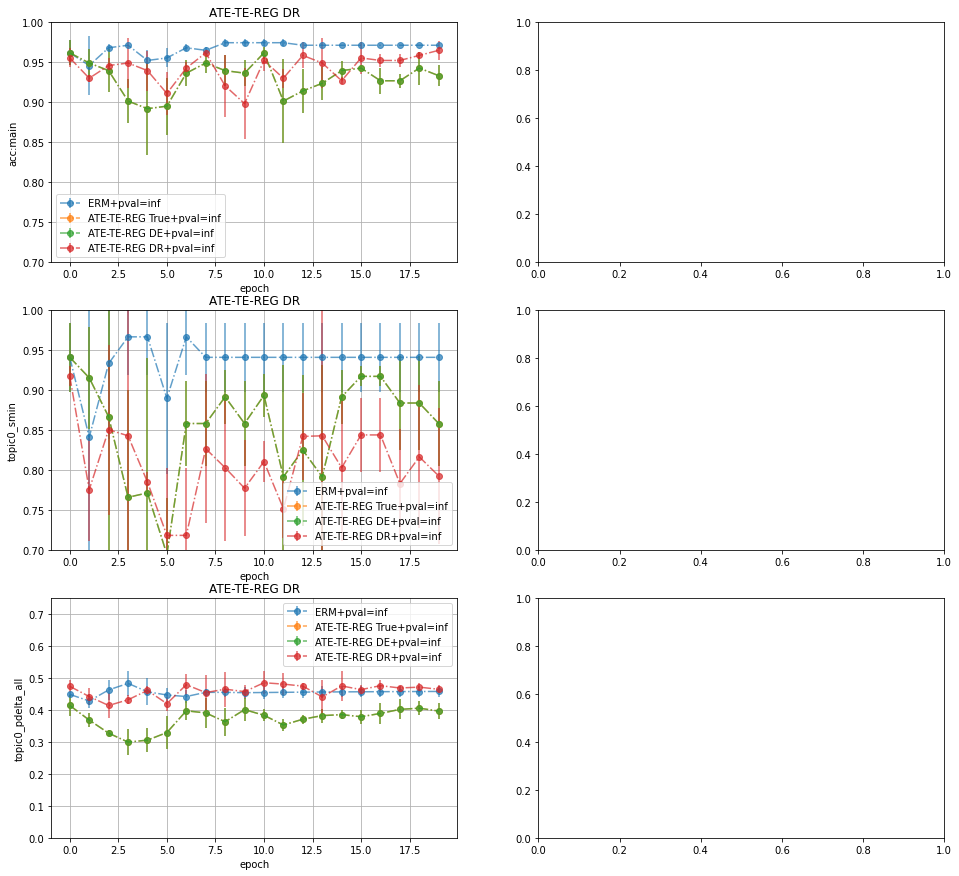

In [159]:
run_list=[0,1,2]
pval_list=["inf"]
ate_list_true = [0.42,] #correct one
# ate_list_de = [0.45,] #direct effect
# ate_list_dr = [0.5,] #DR with correct masking
ate_list_de = [0.42,] #direct effect
ate_list_dr = [0.55,] #DR with correct masking

topic_name="food" #"food",1100 "ambiance",700 "service",900 "noise",500
sample=500#1100


telambda = 1
noise=0.0 #0.0
    

plot_item_list=[
            "acc:main",
            "topic0_smin",
            "topic0_pdelta_all",
#             "emb_norm",
#             "topic0_pos_con_loss",
#             "topic0_neg_con_loss",
#             "topic0_last_emb_norm",
#             "topic1_pos_con_loss",
#             "topic1_neg_con_loss",
#             "topic1_last_emb_norm",
            
]

reg_fname_pattern="dataset/cebab/nlp_logs/cad.cebabs2.rnum({}).topic({}).sample({}).noise({}).pval({}).t0_ate({}).telambda({})/probe_metric_list.json"
erm_fname_pattern="dataset/cebab/nlp_logs/cad.cebabs2.rnum({}).topic({}).sample({}).pval({}).erm/probe_metric_list.json"
erm_noise_fname_pattern="dataset/cebab/nlp_logs/cad.cebabs2.rnum({}).topic({}).sample({}).noise({}).pval({}).erm/probe_metric_list.json"

plt.rcParams['figure.figsize'] = [16, 5*len(plot_item_list)]
fig,ax = plt.subplots(len(plot_item_list),2)

if noise==0.0:
    plot_one_result_timeline(ax=ax,
                             plot_item_list=plot_item_list,
                             run_list=run_list,
                             pval_list=pval_list,
                             ate_list=ate_list_dummy,
                             fname_pattern=erm_fname_pattern.format(
                                                 "{1}",
                                                 topic_name,
                                                 sample,
                                                 "{0}",

                             ),
                             tidx=0,
                             title="ERM",
    )
else:
    plot_one_result_timeline(ax=ax,
                             plot_item_list=plot_item_list,
                             run_list=run_list,
                             pval_list=pval_list,
                             ate_list=ate_list_dummy,
                             fname_pattern=erm_noise_fname_pattern.format(
                                                 "{1}",
                                                 topic_name,
                                                 sample,
                                                 noise,
                                                 "{0}",

                             ),
                             tidx=0,
                             title="ERM",
    )


plot_one_result_timeline(ax=ax,
                         plot_item_list=plot_item_list,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=ate_list_true,
                         fname_pattern=reg_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             noise,
                                             "{0}",
                                             "{2}",
                                             telambda,
                             
                         ),
                         tidx=0,
                         title="ATE-TE-REG True",
)
plot_one_result_timeline(ax=ax,
                         plot_item_list=plot_item_list,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=ate_list_de,
                         fname_pattern=reg_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             noise,
                                             "{0}",
                                             "{2}",
                                             telambda,
                             
                         ),
                         tidx=0,
                         title="ATE-TE-REG DE",
)
plot_one_result_timeline(ax=ax,
                         plot_item_list=plot_item_list,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=ate_list_dr,
                         fname_pattern=reg_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             noise,
                                             "{0}",
                                             "{2}",
                                             telambda,
                             
                         ),
                         tidx=0,
                         title="ATE-TE-REG DR",
)

best loc : 3
best indo: 0.9727891286214193
best ood : 0.9791666666666666
best loc : 0
best indo: 0.9795918464660645
best ood : 0.9652777711550394
best loc : 1
best indo: 0.9761904875437418
best ood : 0.9652777711550394
best loc : 8
best indo: 0.9829932053883871
best ood : 0.9616228143374125


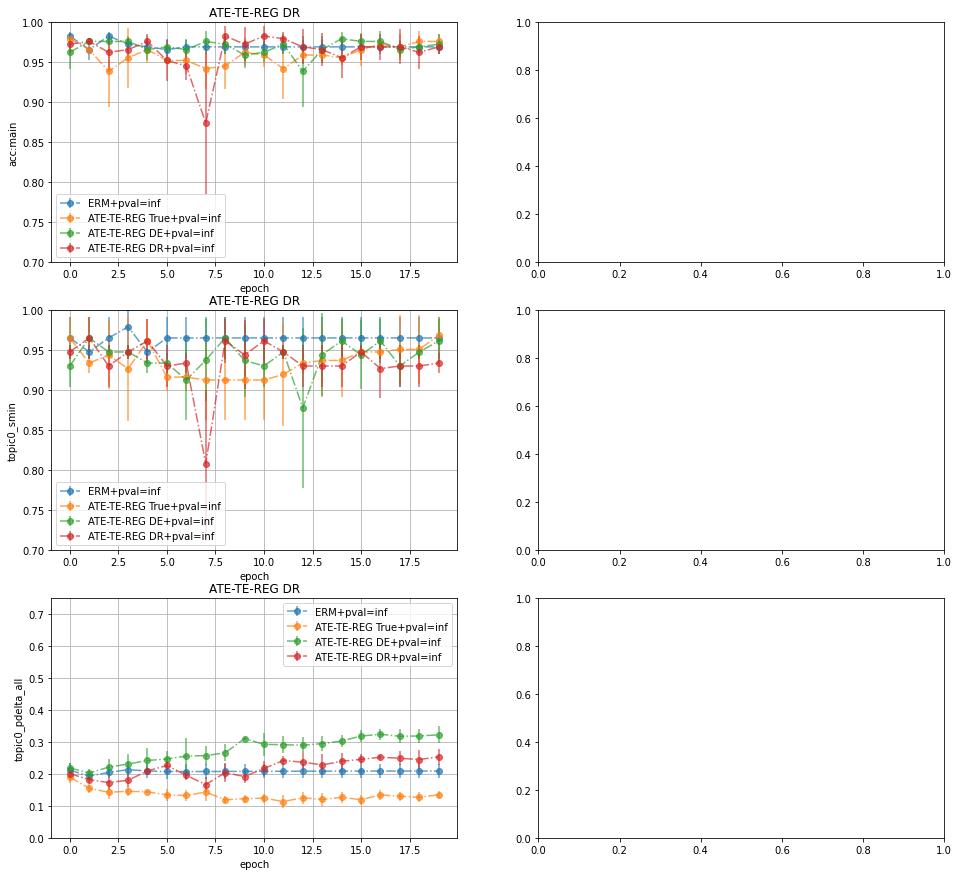

In [160]:
run_list=[0,1,2]
pval_list=["inf"]
ate_list_true = [0.16,] #correct one
# ate_list_de = [0.24,] #direct effect
# ate_list_dr = ["0.20",] #DR with correct masking
ate_list_de = [0.4,] #direct effect
ate_list_dr = ["0.32",] #DR with correct masking

topic_name="service" #"food",1100 "ambiance",700 "service",900 "noise",500
sample=460#900


telambda = 1
noise=0.0
    

plot_item_list=[
            "acc:main",
            "topic0_smin",
            "topic0_pdelta_all",
#             "emb_norm",
#             "topic0_pos_con_loss",
#             "topic0_neg_con_loss",
#             "topic0_last_emb_norm",
#             "topic1_pos_con_loss",
#             "topic1_neg_con_loss",
#             "topic1_last_emb_norm",
            
]

reg_fname_pattern="dataset/cebab/nlp_logs/cad.cebabs2.rnum({}).topic({}).sample({}).noise({}).pval({}).t0_ate({}).telambda({})/probe_metric_list.json"
erm_fname_pattern="dataset/cebab/nlp_logs/cad.cebabs2.rnum({}).topic({}).sample({}).pval({}).erm/probe_metric_list.json"

plt.rcParams['figure.figsize'] = [16, 5*len(plot_item_list)]
fig,ax = plt.subplots(len(plot_item_list),2)

plot_one_result_timeline(ax=ax,
                         plot_item_list=plot_item_list,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=ate_list_dummy,
                         fname_pattern=erm_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             "{0}",
                             
                         ),
                         tidx=0,
                         title="ERM",
)
plot_one_result_timeline(ax=ax,
                         plot_item_list=plot_item_list,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=ate_list_true,
                         fname_pattern=reg_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             noise,
                                             "{0}",
                                             "{2}",
                                             telambda,
                             
                         ),
                         tidx=0,
                         title="ATE-TE-REG True",
)
plot_one_result_timeline(ax=ax,
                         plot_item_list=plot_item_list,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=ate_list_de,
                         fname_pattern=reg_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             noise,
                                             "{0}",
                                             "{2}",
                                             telambda,
                             
                         ),
                         tidx=0,
                         title="ATE-TE-REG DE",
)
plot_one_result_timeline(ax=ax,
                         plot_item_list=plot_item_list,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=ate_list_dr,
                         fname_pattern=reg_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             noise,
                                             "{0}",
                                             "{2}",
                                             telambda,
                             
                         ),
                         tidx=0,
                         title="ATE-TE-REG DR",
)

best loc : 5
best indo: 0.9619047443072001
best ood : 0.9018952051798502
best loc : 3
best indo: 0.9666666587193807
best ood : 0.9710144996643066
best loc : 3
best indo: 0.9666666587193807
best ood : 0.9581939776738485
best loc : 14
best indo: 0.9619047443072001
best ood : 0.95652174949646


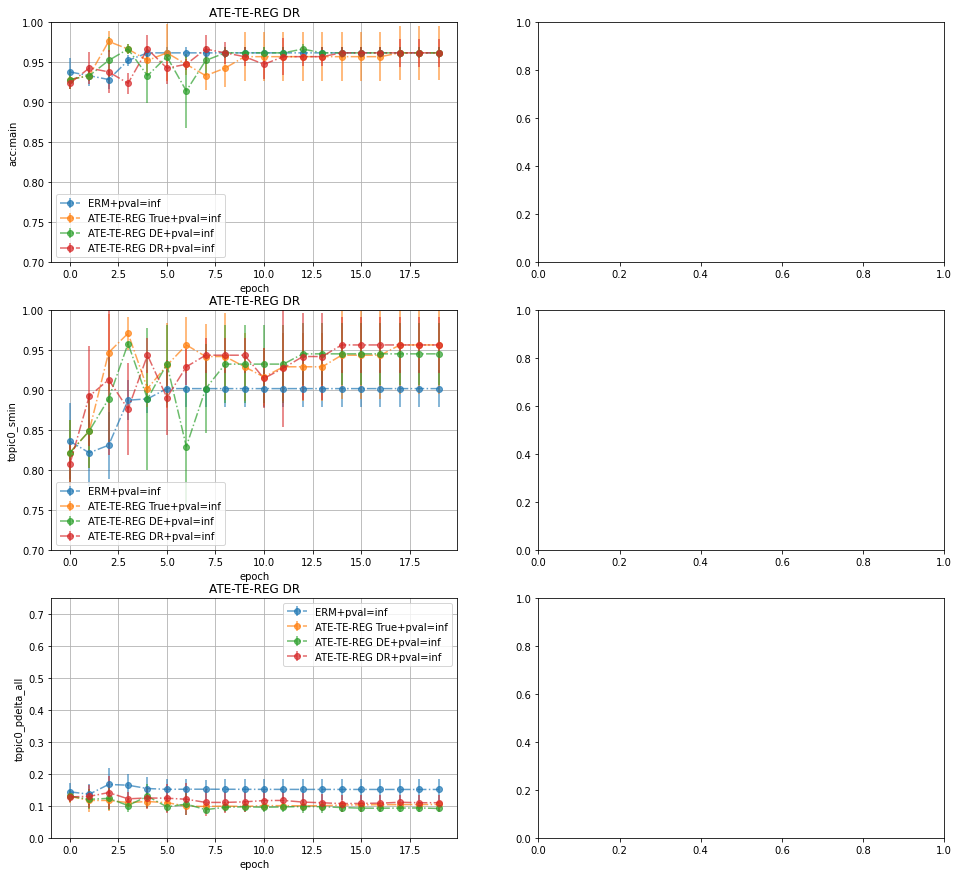

In [161]:
run_list=[0,1,2]
pval_list=["inf"]
ate_list_true = [0.07,] #correct one
# ate_list_de = [0.0,] #direct effect
# ate_list_dr = ["0.04",] #DR with correct masking
ate_list_de = [0.09,] #direct effect
ate_list_dr = ["0.15",] #DR with correct masking

topic_name="ambiance" #"food",1100 "ambiance",700 "service",900 "noise",500
sample=340 #700


telambda = 1
noise=0.0
    

plot_item_list=[
            "acc:main",
            "topic0_smin",
            "topic0_pdelta_all",
#             "emb_norm",
#             "topic0_pos_con_loss",
#             "topic0_neg_con_loss",
#             "topic0_last_emb_norm",
#             "topic1_pos_con_loss",
#             "topic1_neg_con_loss",
#             "topic1_last_emb_norm",
            
]

reg_fname_pattern="dataset/cebab/nlp_logs/cad.cebabs2.rnum({}).topic({}).sample({}).noise({}).pval({}).t0_ate({}).telambda({})/probe_metric_list.json"
erm_fname_pattern="dataset/cebab/nlp_logs/cad.cebabs2.rnum({}).topic({}).sample({}).pval({}).erm/probe_metric_list.json"

plt.rcParams['figure.figsize'] = [16, 5*len(plot_item_list)]
fig,ax = plt.subplots(len(plot_item_list),2)

plot_one_result_timeline(ax=ax,
                         plot_item_list=plot_item_list,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=ate_list_dummy,
                         fname_pattern=erm_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             "{0}",
                             
                         ),
                         tidx=0,
                         title="ERM",
)
plot_one_result_timeline(ax=ax,
                         plot_item_list=plot_item_list,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=ate_list_true,
                         fname_pattern=reg_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             noise,
                                             "{0}",
                                             "{2}",
                                             telambda,
                             
                         ),
                         tidx=0,
                         title="ATE-TE-REG True",
)
plot_one_result_timeline(ax=ax,
                         plot_item_list=plot_item_list,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=ate_list_de,
                         fname_pattern=reg_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             noise,
                                             "{0}",
                                             "{2}",
                                             telambda,
                             
                         ),
                         tidx=0,
                         title="ATE-TE-REG DE",
)
plot_one_result_timeline(ax=ax,
                         plot_item_list=plot_item_list,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=ate_list_dr,
                         fname_pattern=reg_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             noise,
                                             "{0}",
                                             "{2}",
                                             telambda,
                             
                         ),
                         tidx=0,
                         title="ATE-TE-REG DR",
)

best loc : 7
best indo: 0.9523809552192688
best ood : 0.9742160240809122
best loc : 0
best indo: 0.9619047443072001
best ood : 0.9719433784484863
best loc : 4
best indo: 0.9571428497632345
best ood : 0.9909909963607788
best loc : 10
best indo: 0.9666666587193807
best ood : 0.9738518993059794


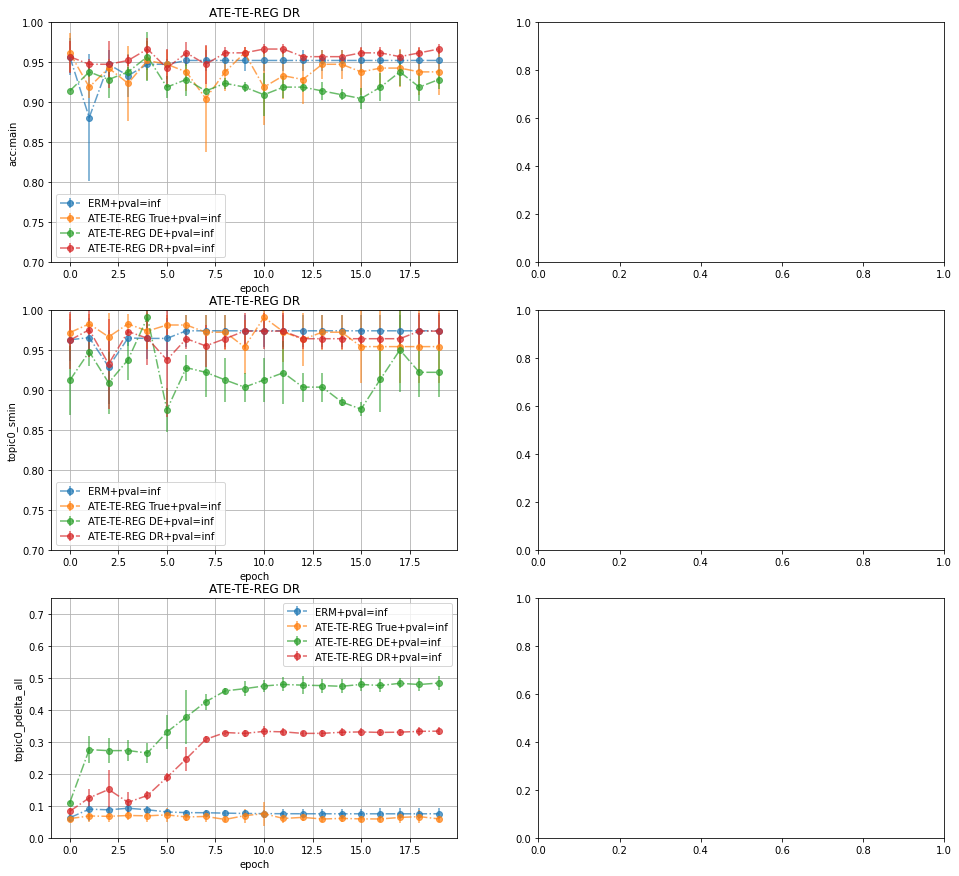

In [9]:
run_list=[0,1,2]
pval_list=["inf"]
ate_list_true = [-0.04,] #correct one
# ate_list_de = [0.38,] #direct effect
# ate_list_dr = ["0.04",] #DR with correct masking
ate_list_de = [0.62,] #direct effect
ate_list_dr = ["0.40",] #DR with correct masking

topic_name="noise" #"food",1100 "ambiance",700 "service",900 "noise",500
sample=320 #500


telambda = 1
noise=0.0
    

plot_item_list=[
            "acc:main",
            "topic0_smin",
            "topic0_pdelta_all",
#             "emb_norm",
#             "topic0_pos_con_loss",
#             "topic0_neg_con_loss",
#             "topic0_last_emb_norm",
#             "topic1_pos_con_loss",
#             "topic1_neg_con_loss",
#             "topic1_last_emb_norm",
            
]

reg_fname_pattern="dataset/cebab/nlp_logs/cad.cebabs2.rnum({}).topic({}).sample({}).noise({}).pval({}).t0_ate({}).telambda({})/probe_metric_list.json"
erm_fname_pattern="dataset/cebab/nlp_logs/cad.cebabs2.rnum({}).topic({}).sample({}).pval({}).erm/probe_metric_list.json"

plt.rcParams['figure.figsize'] = [16, 5*len(plot_item_list)]
fig,ax = plt.subplots(len(plot_item_list),2)

plot_one_result_timeline(ax=ax,
                         plot_item_list=plot_item_list,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=ate_list_dummy,
                         fname_pattern=erm_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             "{0}",
                             
                         ),
                         tidx=0,
                         title="ERM",
)
plot_one_result_timeline(ax=ax,
                         plot_item_list=plot_item_list,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=ate_list_true,
                         fname_pattern=reg_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             noise,
                                             "{0}",
                                             "{2}",
                                             telambda,
                             
                         ),
                         tidx=0,
                         title="ATE-TE-REG True",
)
plot_one_result_timeline(ax=ax,
                         plot_item_list=plot_item_list,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=ate_list_de,
                         fname_pattern=reg_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             noise,
                                             "{0}",
                                             "{2}",
                                             telambda,
                             
                         ),
                         tidx=0,
                         title="ATE-TE-REG DE",
)
plot_one_result_timeline(ax=ax,
                         plot_item_list=plot_item_list,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=ate_list_dr,
                         fname_pattern=reg_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             noise,
                                             "{0}",
                                             "{2}",
                                             telambda,
                             
                         ),
                         tidx=0,
                         title="ATE-TE-REG DR",
)

## Combined cebab runs

best loc : 1
best indo: 0.9951409300168356
best ood : 1.0
best loc : 9
best indo: 0.9873663981755575
best ood : 0.9743589758872986
best loc : 6
best indo: 0.9844509164492289
best ood : 0.9743589758872986
best loc : 6
best indo: 0.9931972821553549
best ood : 1.0


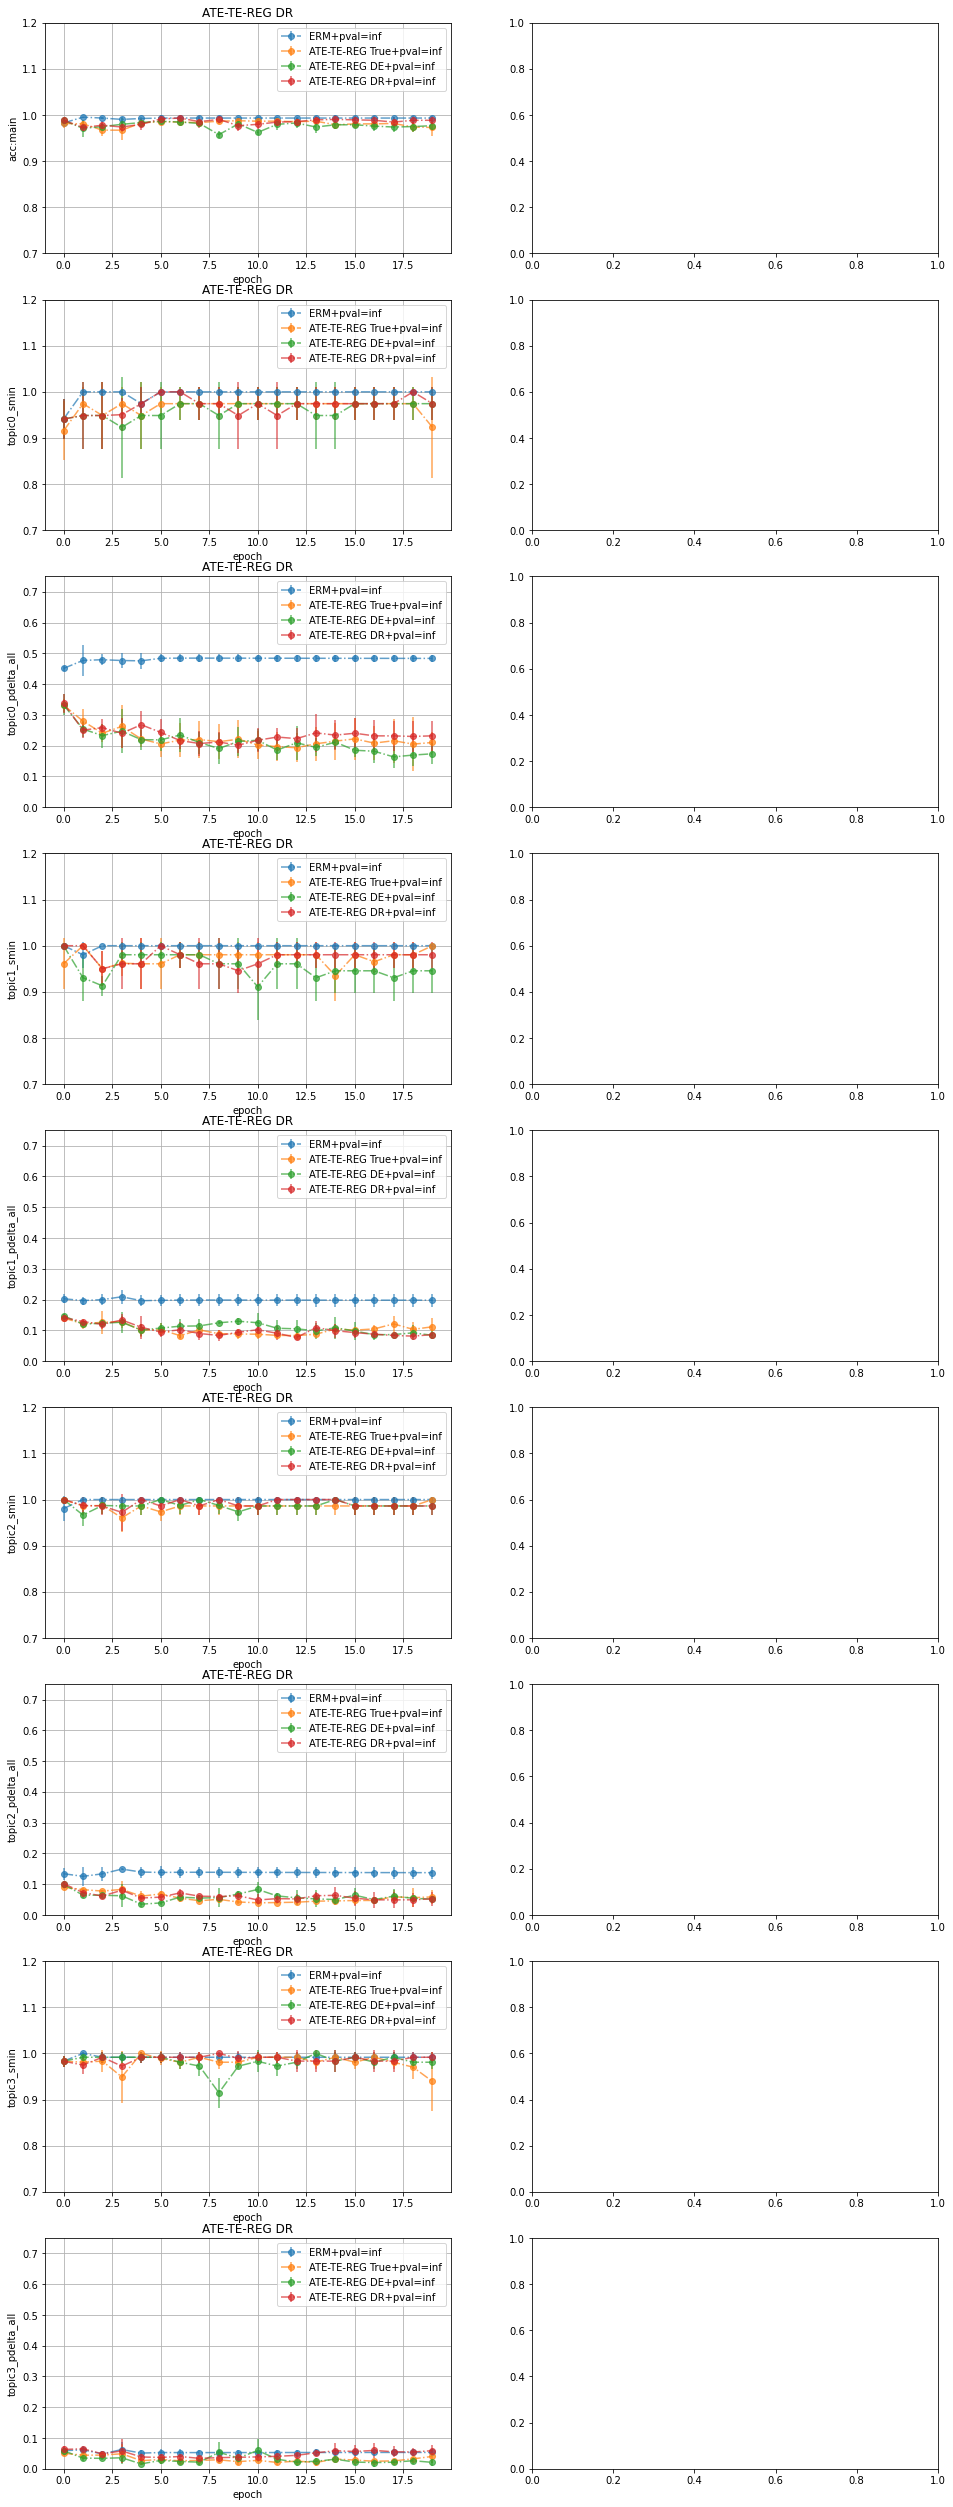

In [12]:
run_list=[0,1,2]
pval_list=["inf"]
ate_list_dummy = [None]*len(pval_list)
ate_list_true = ["true",] #correct one
ate_list_de = ["de",] #direct effect
ate_list_dr = ["dr",] #DR with correct masking

topic_name="all" #"food",1100 "ambiance",700 "service",900 "noise",500
sample="nosymm" #1100


telambda = 1 #1 10
noise=0.0 #0.0
    

plot_item_list=[
            "acc:main",
            "topic0_smin",
            "topic0_pdelta_all",
            "topic1_smin",
            "topic1_pdelta_all",
            "topic2_smin",
            "topic2_pdelta_all",
            "topic3_smin",
            "topic3_pdelta_all",
#             "emb_norm",
#             "topic0_pos_con_loss",
#             "topic0_neg_con_loss",
#             "topic0_last_emb_norm",
#             "topic1_pos_con_loss",
#             "topic1_neg_con_loss",
#             "topic1_last_emb_norm",
            
]

reg_fname_pattern="dataset/cebab_all/nlp_logs/cad.cebabs2.rnum({}).topic({}).sample({}).noise({}).pval({}).t0_ate({}).telambda({})/probe_metric_list.json"
erm_fname_pattern="dataset/cebab_all/nlp_logs/cad.cebabs2.rnum({}).topic({}).sample({}).pval({}).erm/probe_metric_list.json"
erm_noise_fname_pattern="dataset/cebab_all/nlp_logs/cad.cebabs2.rnum({}).topic({}).sample({}).noise({}).pval({}).erm/probe_metric_list.json"

plt.rcParams['figure.figsize'] = [16, 5*len(plot_item_list)]
fig,ax = plt.subplots(len(plot_item_list),2)



plot_one_result_timeline(ax=ax,
                         plot_item_list=plot_item_list,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=ate_list_dummy,
                         fname_pattern=erm_noise_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             noise,
                                             "{0}",

                         ),
                         tidx=0,
                         title="ERM",
)


plot_one_result_timeline(ax=ax,
                         plot_item_list=plot_item_list,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=ate_list_true,
                         fname_pattern=reg_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             noise,
                                             "{0}",
                                             "{2}",
                                             telambda,
                             
                         ),
                         tidx=0,
                         title="ATE-TE-REG True",
)
plot_one_result_timeline(ax=ax,
                         plot_item_list=plot_item_list,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=ate_list_de,
                         fname_pattern=reg_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             noise,
                                             "{0}",
                                             "{2}",
                                             telambda,
                             
                         ),
                         tidx=0,
                         title="ATE-TE-REG DE",
)
plot_one_result_timeline(ax=ax,
                         plot_item_list=plot_item_list,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=ate_list_dr,
                         fname_pattern=reg_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             noise,
                                             "{0}",
                                             "{2}",
                                             telambda,
                             
                         ),
                         tidx=0,
                         title="ATE-TE-REG DR",
)

# CivilComments Dataset

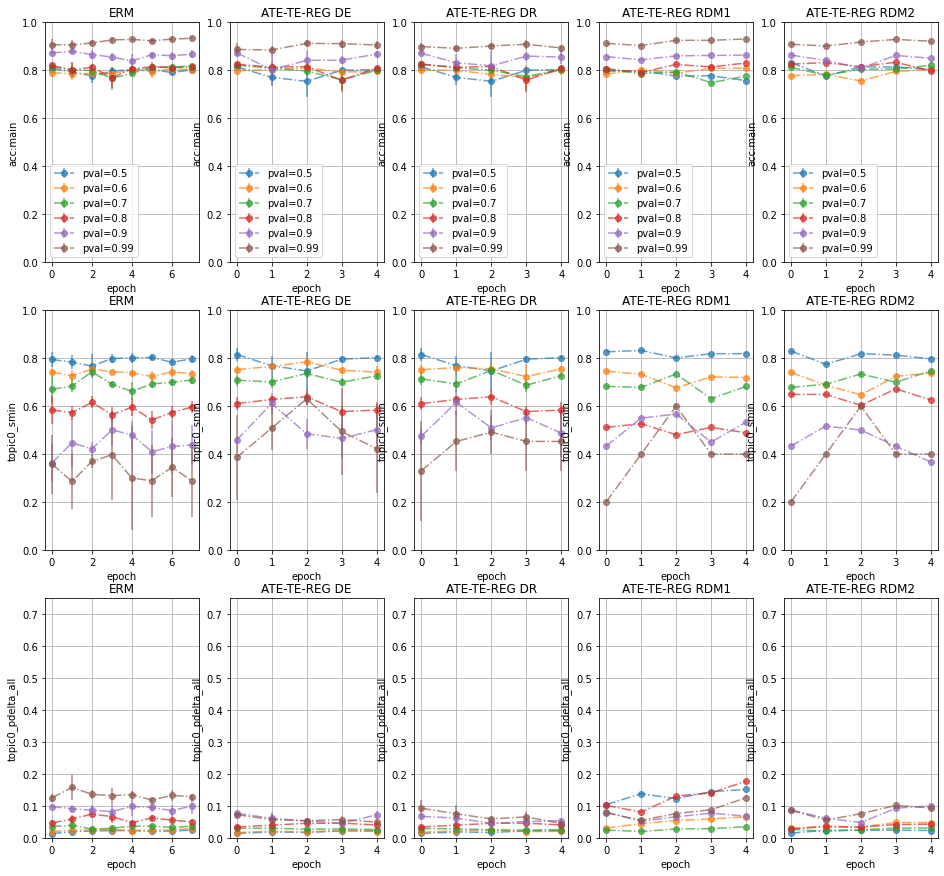

In [78]:
run_list=[0,1,2]
pval_list=[0.5,0.6,0.7,0.8,0.9,0.99]
ate_list_dummy = [None]*len(pval_list)
ate_list_true = [0.05, 0.02, 0.05, 0.05, 0.15, 0.1] #correct one
ate_list_dr = [0.05,0.04,0.04,0.05,0.11,0.15] #DR with correct masking
ate_list_random1 = [0.66,0.46,0.13,0.67,0.25,0.24]
ate_list_random2 = ["0.20",0.43,0.18,0.07,"0.30",0.27]


topic_name="gender"
sample=5000


telambda = 1
noise=0.0
    

plot_item_list=[
            "acc:main",
            "topic0_smin",
            "topic0_pdelta_all",
#             "emb_norm",
#             "topic0_pos_con_loss",
#             "topic0_neg_con_loss",
#             "topic0_last_emb_norm",
#             "topic1_pos_con_loss",
#             "topic1_neg_con_loss",
#             "topic1_last_emb_norm",
            
]

reg_fname_pattern="dataset/civilcomments/nlp_logs/cad.civils2.rnum({}).topic({}).sample({}).noise({}).pval({}).t0_ate({}).telambda({})/probe_metric_list.json"
erm_fname_pattern="dataset/civilcomments/nlp_logs/cad.civils2.rnum({}).topic({}).sample({}).pval({}).erm/probe_metric_list.json"

plt.rcParams['figure.figsize'] = [16, 5*len(plot_item_list)]
fig,ax = plt.subplots(len(plot_item_list),5)

plot_one_result_timeline(ax=ax,
                         plot_item_list=plot_item_list,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=ate_list_dummy,
                         fname_pattern=erm_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             "{0}",
                             
                         ),
                         tidx=0,
                         title="ERM",
)
plot_one_result_timeline(ax=ax,
                         plot_item_list=plot_item_list,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=ate_list_true,
                         fname_pattern=reg_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             noise,
                                             "{0}",
                                             "{2}",
                                             telambda,
                             
                         ),
                         tidx=1,
                         title="ATE-TE-REG DE",
)
plot_one_result_timeline(ax=ax,
                         plot_item_list=plot_item_list,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=ate_list_dr,
                         fname_pattern=reg_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             noise,
                                             "{0}",
                                             "{2}",
                                             telambda,
                             
                         ),
                         tidx=2,
                         title="ATE-TE-REG DR",
)
plot_one_result_timeline(ax=ax,
                         plot_item_list=plot_item_list,
                         run_list=[0,],
                         pval_list=pval_list,
                         ate_list=ate_list_random1,
                         fname_pattern=reg_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             noise,
                                             "{0}",
                                             "{2}",
                                             telambda,
                             
                         ),
                         tidx=3,
                         title="ATE-TE-REG RDM1",
)
plot_one_result_timeline(ax=ax,
                         plot_item_list=plot_item_list,
                         run_list=[0,],
                         pval_list=pval_list,
                         ate_list=ate_list_random2,
                         fname_pattern=reg_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             noise,
                                             "{0}",
                                             "{2}",
                                             telambda,
                             
                         ),
                         tidx=4,
                         title="ATE-TE-REG RDM2",
)

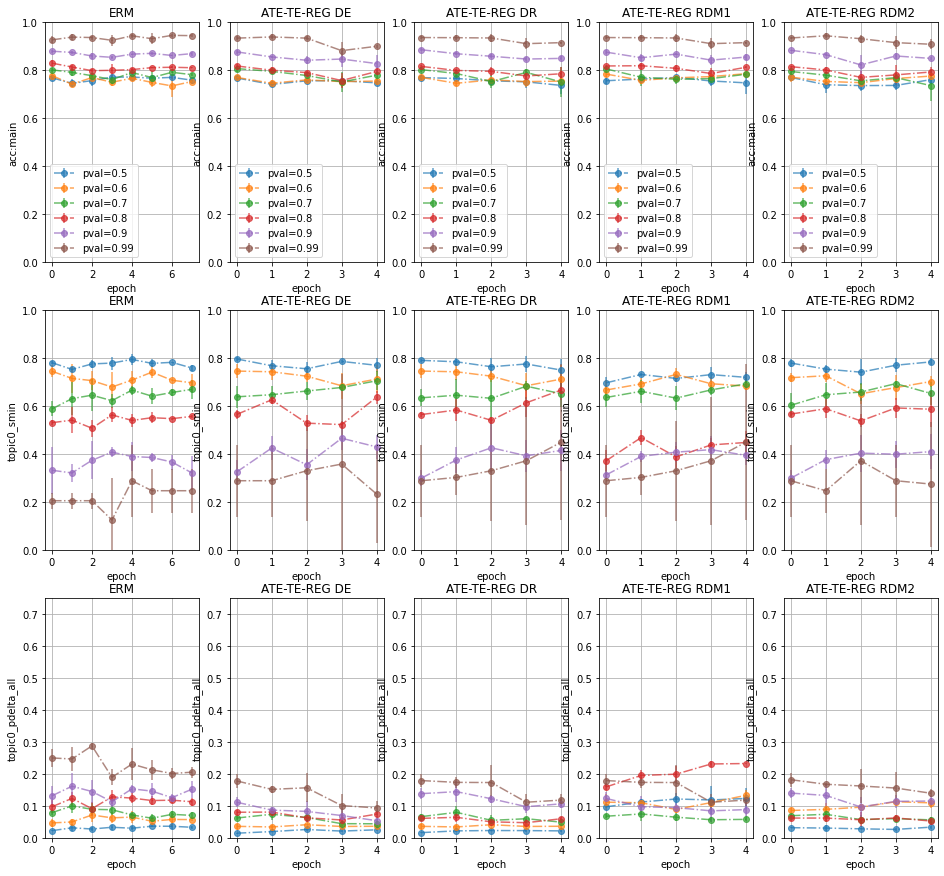

In [75]:
run_list=[0,1,2]
pval_list=[0.5,0.6,0.7,0.8,0.9,0.99]
ate_list_dummy = [None]*len(pval_list)
ate_list_true = [-0.03,0.06,0.1,0.2,0.18,0.21] #correct one
ate_list_dr = [-0.01,0.06,0.12,0.05,0.3,0.24] #DR with correct masking
ate_list_random1 = [0.66,0.46,0.13,0.67,0.25,0.24]
ate_list_random2 = ["0.20",0.43,0.18,0.07,"0.30",0.27]


topic_name="race"
sample=5000


telambda = 1
noise=0.0
    

plot_item_list=[
            "acc:main",
            "topic0_smin",
            "topic0_pdelta_all",
#             "emb_norm",
#             "topic0_pos_con_loss",
#             "topic0_neg_con_loss",
#             "topic0_last_emb_norm",
#             "topic1_pos_con_loss",
#             "topic1_neg_con_loss",
#             "topic1_last_emb_norm",
            
]

reg_fname_pattern="dataset/civilcomments/nlp_logs/cad.civils2.rnum({}).topic({}).sample({}).noise({}).pval({}).t0_ate({}).telambda({})/probe_metric_list.json"
erm_fname_pattern="dataset/civilcomments/nlp_logs/cad.civils2.rnum({}).topic({}).sample({}).pval({}).erm/probe_metric_list.json"

plt.rcParams['figure.figsize'] = [16, 5*len(plot_item_list)]
fig,ax = plt.subplots(len(plot_item_list),5)

plot_one_result_timeline(ax=ax,
                         plot_item_list=plot_item_list,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=ate_list_dummy,
                         fname_pattern=erm_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             "{0}",
                             
                         ),
                         tidx=0,
                         title="ERM",
)
plot_one_result_timeline(ax=ax,
                         plot_item_list=plot_item_list,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=ate_list_true,
                         fname_pattern=reg_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             noise,
                                             "{0}",
                                             "{2}",
                                             telambda,
                             
                         ),
                         tidx=1,
                         title="ATE-TE-REG DE",
)
plot_one_result_timeline(ax=ax,
                         plot_item_list=plot_item_list,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=ate_list_dr,
                         fname_pattern=reg_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             noise,
                                             "{0}",
                                             "{2}",
                                             telambda,
                             
                         ),
                         tidx=2,
                         title="ATE-TE-REG DR",
)
plot_one_result_timeline(ax=ax,
                         plot_item_list=plot_item_list,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=ate_list_random1,
                         fname_pattern=reg_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             noise,
                                             "{0}",
                                             "{2}",
                                             telambda,
                             
                         ),
                         tidx=3,
                         title="ATE-TE-REG RDM1",
)
plot_one_result_timeline(ax=ax,
                         plot_item_list=plot_item_list,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=ate_list_random2,
                         fname_pattern=reg_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             noise,
                                             "{0}",
                                             "{2}",
                                             telambda,
                             
                         ),
                         tidx=4,
                         title="ATE-TE-REG RDM2",
)

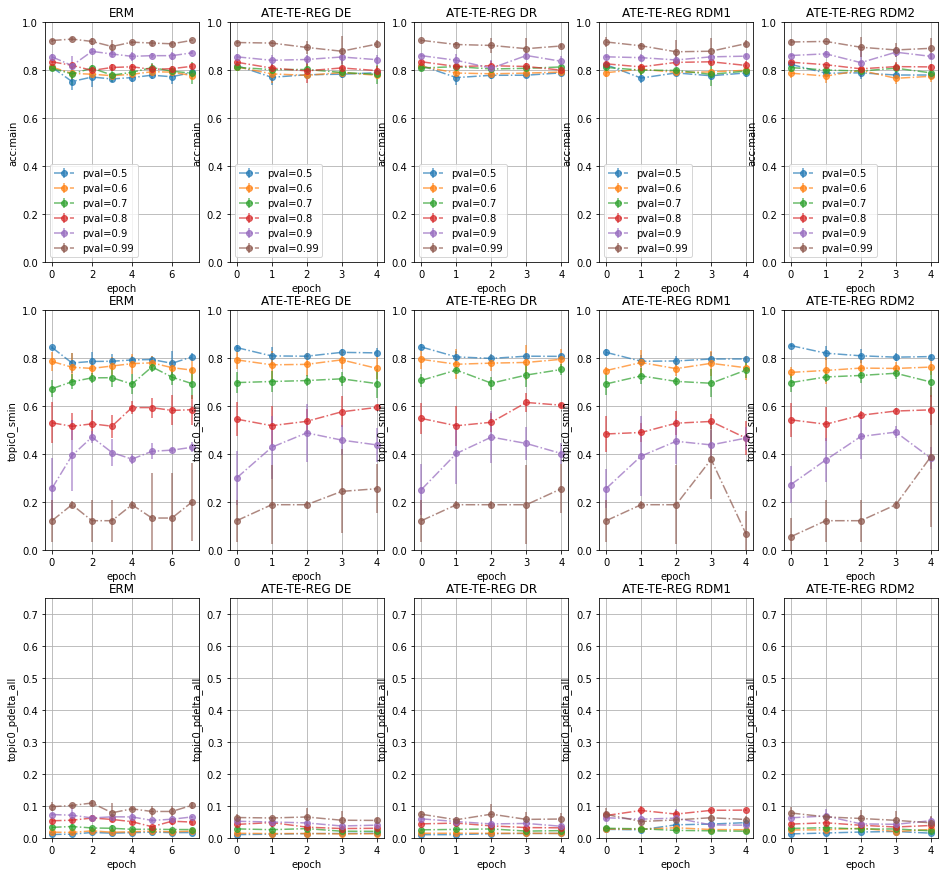

In [73]:
run_list=[0,1,2]
pval_list=[0.5,0.6,0.7,0.8,0.9,0.99]
ate_list_dummy = [None]*len(pval_list)
ate_list_true = [0.0,0.0,0.08,0.05,0.08,0.1] #correct one
ate_list_dr = [0.01,0.02,0.04,0.09,0.09,0.18] #DR with correct masking
ate_list_random1 = [0.66,0.46,0.13,0.67,0.25,0.24]
ate_list_random2 = ["0.20",0.43,0.18,0.07,"0.30",0.27]


topic_name="religion"
sample=4000


telambda = 1
noise=0.0
    

plot_item_list=[
            "acc:main",
            "topic0_smin",
            "topic0_pdelta_all",
#             "emb_norm",
#             "topic0_pos_con_loss",
#             "topic0_neg_con_loss",
#             "topic0_last_emb_norm",
#             "topic1_pos_con_loss",
#             "topic1_neg_con_loss",
#             "topic1_last_emb_norm",
            
]

reg_fname_pattern="dataset/civilcomments/nlp_logs/cad.civils2.rnum({}).topic({}).sample({}).noise({}).pval({}).t0_ate({}).telambda({})/probe_metric_list.json"
erm_fname_pattern="dataset/civilcomments/nlp_logs/cad.civils2.rnum({}).topic({}).sample({}).pval({}).erm/probe_metric_list.json"

plt.rcParams['figure.figsize'] = [16, 5*len(plot_item_list)]
fig,ax = plt.subplots(len(plot_item_list),5)

plot_one_result_timeline(ax=ax,
                         plot_item_list=plot_item_list,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=ate_list_dummy,
                         fname_pattern=erm_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             "{0}",
                             
                         ),
                         tidx=0,
                         title="ERM",
)
plot_one_result_timeline(ax=ax,
                         plot_item_list=plot_item_list,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=ate_list_true,
                         fname_pattern=reg_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             noise,
                                             "{0}",
                                             "{2}",
                                             telambda,
                             
                         ),
                         tidx=1,
                         title="ATE-TE-REG DE",
)
plot_one_result_timeline(ax=ax,
                         plot_item_list=plot_item_list,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=ate_list_dr,
                         fname_pattern=reg_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             noise,
                                             "{0}",
                                             "{2}",
                                             telambda,
                             
                         ),
                         tidx=2,
                         title="ATE-TE-REG DR",
)
plot_one_result_timeline(ax=ax,
                         plot_item_list=plot_item_list,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=ate_list_random1,
                         fname_pattern=reg_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             noise,
                                             "{0}",
                                             "{2}",
                                             telambda,
                             
                         ),
                         tidx=3,
                         title="ATE-TE-REG RDM1",
)
plot_one_result_timeline(ax=ax,
                         plot_item_list=plot_item_list,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=ate_list_random2,
                         fname_pattern=reg_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             noise,
                                             "{0}",
                                             "{2}",
                                             telambda,
                             
                         ),
                         tidx=4,
                         title="ATE-TE-REG RDM2",
)